Họ và Tên: Bùi Thị Thanh Phương
MSSV: 20110280

# 4. Với bức ảnh sau, hãy
a) nén ảnh trên bằng việc sử dụng non-negative matrix factorization (NMF) .

b) Hãy nén ảnh trên bằng việc sử dụng truncated singular value decomposition.

c) So sánh the performance giữa NMF và truncated singular value decomposition.

d) Hãy thực thi NMF bằng alternative nonnegative least squares (ANLS). Chỉ cần run với 30 vòng lặp là được,
không cần kiểm tra sự hội tụ.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import load_sample_images
from skimage import io

Read the image


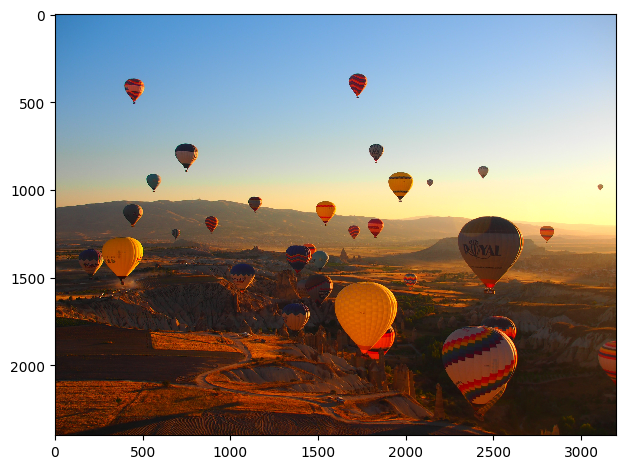

In [2]:
# Load ảnh mẫu từ scikit-learn
print("Read the image")
image = io.imread('/content/hot_air_balloons.jpg')
io.imshow(image)
io.show()

a) nén ảnh trên bằng việc sử dụng non-negative matrix factorization (NMF) .

In [3]:
# Chuyển đổi ảnh thành ma trận dữ liệu
X = image.reshape(-1, 3)

In [4]:
# Áp dụng phương pháp NMF với 32 thành phần
model = NMF(n_components=32, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

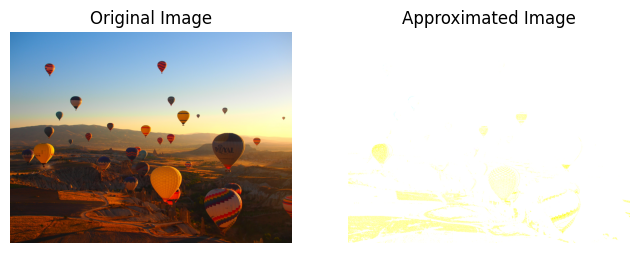

In [5]:
# Tái tạo ảnh từ các thành phần NMF
X_approx = np.dot(W, H)
img_approx = X_approx.reshape(image.shape)

# Vẽ ảnh gốc và ảnh tái tạo
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(img_approx)
axes[1].set_title('Approximated Image')
for ax in axes:
    ax.axis('off')
plt.show()

b) Hãy nén ảnh trên bằng việc sử dụng truncated singular value decomposition.

In [ ]:
from scipy.linalg import svd

In [ ]:
# Áp dụng phương pháp TSVD với 32 singular values
U, S, Vt = svd(X, full_matrices=False)
S_truncated = np.zeros_like(S)
S_truncated[:32] = S[:32]
X_approx = U.dot(np.diag(S_truncated)).dot(Vt)
image_approx = X_approx.reshape(image.shape)

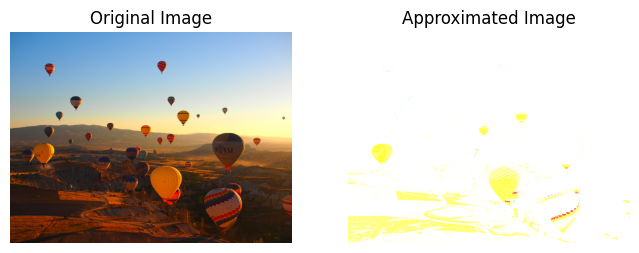

In [ ]:
# Vẽ ảnh gốc và ảnh tái tạo
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(image_approx)
axes[1].set_title('Approximated Image')
for ax in axes:
    ax.axis('off')
plt.show()

c) So sánh the performance giữa NMF và truncated singular value decomposition.

- ảnh sau khi nén bằng phương pháp  truncated singular value decomposition rỏ hơn NMF

- NMF là phương pháp phân tích ma trận không âm (non-negative matrix factorization), trong đó ma trận ban đầu được phân tích thành tích của hai ma trận không âm. Phương pháp này thường được sử dụng để giảm chiều dữ liệu, trích xuất đặc trưng và phân tích chủ đề trong các bài toán xử lý ngôn ngữ tự nhiên và hình ảnh. NMF yêu cầu ma trận ban đầu và các ma trận kết quả đều phải là ma trận không âm, do đó nó giới hạn việc áp dụng vào các bài toán có các giá trị âm trong dữ liệu.

- tSVD là phương pháp phân tích ma trận dựa trên giá trị đơn (singular value decomposition), trong đó ma trận ban đầu được phân tích thành tích của ba ma trận: ma trận left singular vectors, ma trận right singular vectors và ma trận singular values. Phương pháp này thường được sử dụng để giảm chiều dữ liệu, xử lý tín hiệu và khai thác dữ liệu. tSVD giới hạn ma trận ban đầu và các ma trận kết quả đều có các giá trị không âm, nhưng không yêu cầu các ma trận này phải là ma trận không âm.-

# d) Hãy thực thi NMF bằng alternative nonnegative least squares (ANLS). Chỉ cần run với 30 vòng lặp là được,
không cần kiểm tra sự hội tụ.

In [ ]:

# Khởi tạo ma trận W và ma trận H bằng cách sử dụng phương pháp ANLS
r = 2
m, n = X.shape
W = np.random.rand(m, r)
H = np.random.rand(r, n)
for i in range(30):
    H = np.linalg.lstsq(W, X, rcond=None)[0]
    H[H < 0] = 0
    W = np.linalg.lstsq(H.T, X.T, rcond=None)[0].T
    W[W < 0] = 0

# Tái tạo ma trận V từ ma trận W và ma trận H
X_approx = W.dot(H)